# Particle in a Sphere

## Motivation:

Gearing up to work on the hydrogen atom, we recognize that the hydrogen atom is a spherically symmetric system.  That is, we care about the distance of the electron from the proton/nucleus not the specific $x$, $y$, and $z$ coordinates of the electron.  Here, we consider what constraining a particle to a sphere does as opposed to a cube.

## Learning Goals:

After working through these notes, you will be able to:

1. Convert between Cartesian and spherical polar coordinates
2. Write out the Laplacian in spherical polar coordinates
3. Write out the Hamiltonian for the particle in a the sphere
4. Perform separation of variables on the particle in a sphere Hamiltonian
5. Identify the solutions to the $\phi$ differential equation
6. Identify the solutions to the $\theta$ differential equation
7. Describe the orthonormal property of the spherical harmonics
8. Identify the solutions to the radial component of the particle in a sphere problem
9. Describe how the three quantum numbers affect the energy and wave function of the particle in the sphere.

## Coding Concepts:

The following coding concepts are used in this notebook

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Statement of the Problem

Consider a particle restricted to be ***in a sphere***.  This is equivalent to a free particle (no potential) inside a fixed radius and an infinte potential at $r_0$.  

We would like to know the allowed energies and probability of positions for such a system.  To get these we will setup and solve the Schrodinger equation.

We start by defining the Hamiltonian for such a system.

## The Hamiltonian

We start constructing the Hamiltonian in the same way for every problem.  The Hamiltonian is always (for the sake of this class/these notes) a sum of the Kinetic Energy operator and the Potential Energy operator:
\begin{equation}
\hat{H} = \hat{K} + \hat{V}.
\end{equation}

The potential energy for this problem is zero since the particle is *free* inside the sphere and cannot go outside of the sphere.  Thus
\begin{equation}
\hat{H} = \hat{K}
\end{equation}

The Kinetic Energy operator in three dimensions for a single particle is
\begin{equation}
\hat{K} = -\frac{\hbar^2}{2m}\left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}\right)
\end{equation}

We could attempt to solve this problem in Cartesian coordinates.  Solving the differential equation will yield the same initial solutions as the 3D particle in a box:
\begin{align}
X(x) = A\sin k_x x + B\cos k_x x \\
Y(y) = A\sin k_y y + B\cos k_y y \\
Z(z) = A\sin k_z z + B\cos k_z z 
\end{align}
where the total wavefunction is $\psi(x,y,z) = X(x)Y(y)Z(z)$

The issue is that applying the boundary condition that
\begin{equation}
\psi(r=r_0) = 0
\end{equation}
is difficult in Cartesian coordinates in part because it requires a coupling of $x$, $y$, and $z$.  Instead, we will solve the problem in spherical polar coordinates.

## Spherical Polar Coordinates

In spherical polar coordinates, we define a point in $\mathbb{R}^3$ by a distane from the origin, $r$, and two angles, $\theta$ and $\phi$.  

![title](img/SphericalCoordinates_1201.svg)

These can be expressed in terms of Cartesian coordinates as
\begin{align}
r &= \sqrt{x^2+ y^2 + z^2} \\
\phi &= \tan^{-1}\frac{y}{x} \\
\theta &= \cos^{-1}\frac{z}{r}
\end{align}
Note that the following domain limits are placed on these coordinates
\begin{align}
0 \leq &r < \infty \\
0 \leq &\theta \leq \pi \\
0 \leq &\phi \leq 2\pi
\end{align}
The Cartesian coordinated in terms of their spherical counterparts are:
\begin{align}
x &= r\sin\theta\cos\phi \\
y &= r\sin\theta\sin\phi \\
z &= r\cos\theta
\end{align}

In order to describe the particle in a sphere problem in spherical coordinates, we need to define the Hamiltonian in spherical coordinates.  This can be done with the equations above and their derivatives and second derivatives.  The derivation is long and tedious so here we present the result for the Laplacian in spherical polar coordinates:
\begin{equation}
\nabla^2_{r\theta\phi} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}
\end{equation}

## Separation of Variables in Spherical Coordinates

The Schrodinger equation in spherical polar coordinates is

\begin{align}
\hat{H}\psi(r,\theta,\phi) &= E \psi(r,\theta,\phi) \\
-\frac{\hbar^2}{2m}\nabla^2_{r\theta\phi} &= E \psi(r,\theta,\phi) \\
-\frac{\hbar^2}{2m}\left[\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right] \psi(r,\theta,\phi) &= E \psi(r,\theta,\phi)
\end{align}

This equation does not look immediately separable.  Indeed it looks quite intimidating.  It turns out, however, that the equation is separable into $r$, $\theta$, and $\phi$ components. We will start by separating $r$ from $\theta$ and $\phi$.  

Multiply both sides of the above equation by $2mr^2$ to get

\begin{equation}
-\hbar^2\left[\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) - \frac{\hbar^2}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\psi(r,\theta,\phi)  = 2mr^2E\psi(r,\theta,\phi)
\end{equation}

Rearrange (combine terms dependent on $r$) to get

\begin{equation}
-\hbar^2\left[\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\psi(r,\theta,\phi) -\hbar^2\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)\psi(r,\theta,\phi) = 2mr^2E\psi(r,\theta,\phi)
\end{equation}

Notice that we have a sum of a term that depends on $\theta$ and $\phi$ and then two terms that depend only on $r$.  Thus we can posit a separation of variables such that
\begin{equation}
\psi(r,\theta,\phi) = R(r)Y(\theta,\phi)
\end{equation}

Additionally, we will define the angular momentum operator (that only operates on $\theta$ and $\phi$) as
\begin{equation}
\hat{L}^2 = -\hbar^2\left(\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right)
\end{equation}

Substite the above equation for $\psi$ into the Schrodinger equation to get
\begin{align}
\hat{L}^2R(r)Y(\theta,\phi) -\hbar^2 \frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r)Y(\theta,\phi) &= 2mr^2ER(r)Y(\theta,\phi) \\
\Rightarrow \frac{1}{Y(\theta,\phi)}\hat{L}^2Y(\theta,\phi) = \frac{\hbar^2}{R(r)}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r) + 2mr^2E
\end{align}

Notice that the left-hand side depends on $\theta$ and $\phi$ only and the right-hand side depends on $r$ only.  Thus, we must have that
\begin{equation}
\frac{1}{Y(\theta,\phi)}\hat{L}^2Y(\theta,\phi) = \alpha,
\end{equation}
where $\alpha$ is a constant.

Additionally, we must have that
\begin{equation}
\frac{\hbar^2}{R(r)}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r) + 2mr^2E = \alpha
\end{equation}


We will solve these two equations separately.

## Solutions to $\theta$ and $\phi$ equation

It is the goal of this section of the notes to find a solution to the differential equation
\begin{equation}
\frac{1}{Y(\theta,\phi)}\hat{L}^2Y(\theta,\phi) = \alpha,
\end{equation}
where $\alpha$ is a constant.

This equation can be rearranged to the eigenvalue equation
\begin{equation}
\hat{L}^2Y(\theta,\phi) =\alpha Y(\theta,\phi)
\end{equation}
Now plugging back in the expanded form of $\hat{L}^2$ we get
\begin{align}
-\hbar^2\left(\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right)Y(\theta,\phi) &= E_{\theta,\phi}Y(\theta,\phi) \\
\Rightarrow \left(\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right)Y(\theta,\phi) &= \frac{-\alpha}{\hbar^2}Y(\theta,\phi)
\end{align}

Multiplying the above equation by $\sin^2\theta$ yields
\begin{align}
\left(\sin\theta\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{\partial^2}{\partial^2\phi}\right)Y(\theta,\phi) &= \frac{-\alpha\sin^2\theta}{\hbar^2}Y(\theta,\phi)
\end{align}
We notice that this motivates a separation of variables into 
\begin{equation}
Y(\theta,\phi) = \Theta(\theta)\Phi(\phi)
\end{equation}

Substituting this and $\beta = \frac{\alpha}{\hbar^2}$ yields

\begin{equation}
\left[\sin\theta\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\beta\sin^2\theta \right] \Theta(\theta)\Phi(\phi) = -\frac{\partial^2}{\partial^2\phi} \Theta(\theta)\Phi(\phi).
\end{equation}

Divide both sides of the equation above by $\Theta(\theta)\Phi(\phi)$ and note that the operator on the right-hand side is independent of $\theta$ to yield

\begin{equation}
\frac{\sin\theta}{\Theta(\theta)}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)\Theta(\theta)+\beta\sin^2\theta = -\frac{1}{\Phi(\phi)}\frac{\partial^2}{\partial^2\phi} \Phi(\phi).
\end{equation}

Now the left-hand side is independent of $\phi$ and the right-hand side is independent of $\theta$.  Since these two things are equal but independent of the other's variable they must be constant.  We will define this constant as $m^2$ (for reasons that will become clear later) and solve the following two equations independently

$m^2 = -\frac{1}{\Phi(\phi)}\frac{\partial^2}{\partial^2\phi} \Phi(\phi) \tag{1}$

$m^2 = \frac{\sin\theta}{\Theta(\theta)}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)\Theta(\theta)+\beta\sin^2\theta \tag{2}$

### Solutions to $\phi$ equation (1)

Equation (1) above can me simply rearranged to give

$-m^2 \Phi(\phi)= \frac{\partial^2}{\partial^2\phi} \Phi(\phi)$

which is straightforward eigenvalue-eigenvector problem with solutions

$\Phi(\phi) = A_me^{im\phi}\quad \mathrm{and}\quad A_{-m}e^{-im\phi}$.

Applying boundary conditions, $\Phi(\phi+2\pi) = \Phi(\phi)$ yields the quantization

$m=0,\pm 1, \pm 2, ...$

Thus we can write

$\Phi(\phi) = Ae^{im\phi} \quad m=0,\pm 1, \pm 2, ...$.

Normalization yields $A=\frac{1}{\sqrt{2\pi}}$.

### Solutions to $\theta$ equation (2)

The solutions to equation (2) above are not as straightforward as those for equation (1).  We start by rewriting the original equation here:

$m^2 = \frac{\sin\theta}{\Theta(\theta)}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)\Theta(\theta)+\beta\sin^2\theta$.

Now make a change of variable $x = \cos\theta$ which yields $\frac{dx}{-\sin\theta}=d\theta$ and define $P(x) = \Theta(\theta)$.  Plugging these in an performing some rearrangements yields the Legendre equation

$(1-x^2)\frac{d^2}{dx^2}P(x)-2x\frac{d}{dx}P(x)+\left[\beta-\frac{m^2}{1-x^2}\right]P(x) = 0$.

For $\Theta(\theta)$ to be continous $\beta=l(l+1)$ where $l=0,1,2...$.  Note that this also puts a limit on $m$ with $m=0,\pm 1, \pm 2, ... , \pm l$.   

The solutions, $P(x)$, to the Legendre equation are known as the Associated Legendre polynomials.  

$P_l^m = (-1)^m(1-x^2)^{m/2}\frac{d^m}{dx^m}P_l(x)$

where

$P_l(x) = \sum_{k=0}^{\infty}\frac{(-l)_k(l+1)_k}{k!^2}\left(\frac{1-x}{2}\right)^k$

and $(l)_k = \frac{(l+k-1)!}{(l-1)!}$.


Below is a table of the first few associated Lengedre polynomials followed by a plot of these functions

| $l$ | $m$ | $P_l^m(x)$|
| :-- | :-- | :-------- |
| 0   | 0   | $P_0^0(x) = 1$ |
| $1$   | $-1$  | $P_1^{-1}(x) = \frac{1}{2}\sqrt{1-x^2}$ |
| $1$   | $0$  | $P_1^{0}(x) = x$ |
| $1$   | $1$  | $P_1^{-1}(x) = -\sqrt{1-x^2}$ |

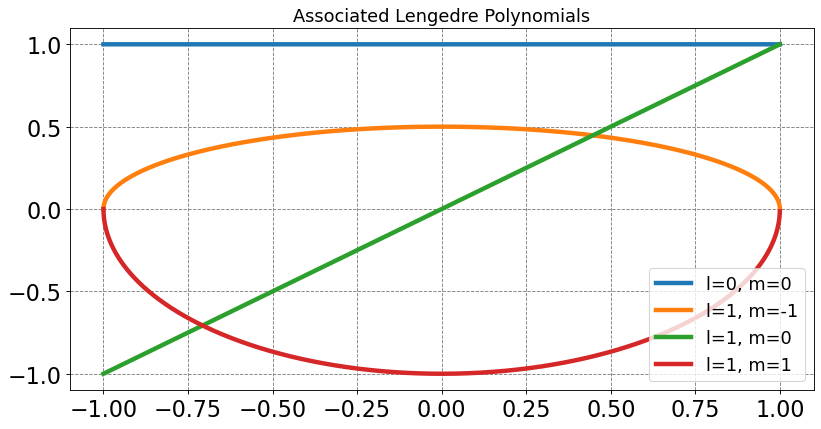

In [46]:
# plot of some of the Legendre polynomials
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import lpmv
x = np.arange(-1,1,0.0001)
plt.figure(figsize=(12,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
for l in range(2):
    for m in range(-l,l+1):
        label = "l=" + str(l) + ", m=" + str(m)
        plt.plot(x,lpmv(m,l,x),lw=4,label=label)
plt.title("Associated Lengedre Polynomials",fontsize=16)
plt.legend(fontsize=16);

### Combining Solutions to $\theta$ and $\phi$

The total wavefunctions are the product of $\Phi(\phi)$ and $\Theta(\theta)$.  It is easy to see

$Y_l^m(\theta,\phi)\propto P_l^{|m|}(\cos\theta)e^{im\phi}$.

These are the spherical harmonics. We will now look at some of these.

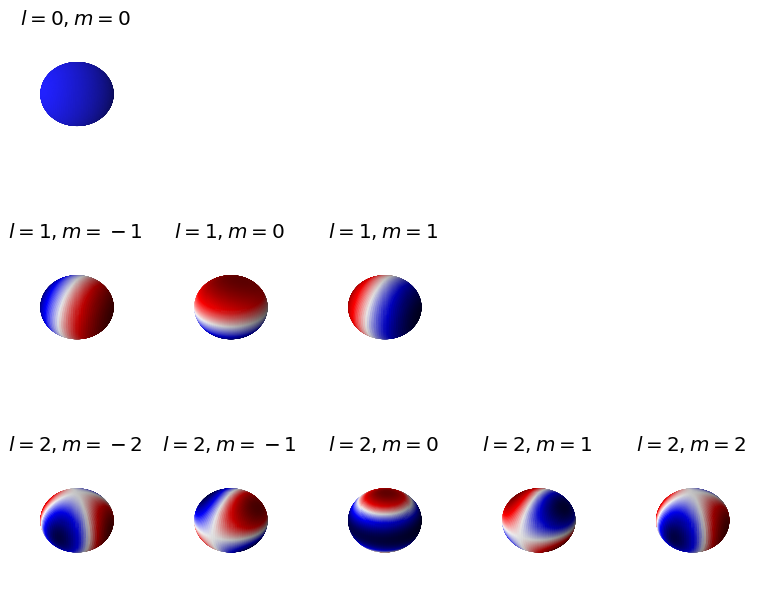

In [83]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
%matplotlib inline
from scipy.special import sph_harm
def plot_spherical_harmonic(m,l, ax_obj, theta=np.linspace(0,np.pi,100),phi=np.linspace(0,2*np.pi,100)):
    THETA, PHI = np.meshgrid(theta, phi)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    Z = np.cos(THETA)
    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    fcolors = sph_harm(m, l, PHI, THETA).real
    fmax, fmin = fcolors.max(), fcolors.min()
    if l>0:
        fcolors = (fcolors - fmin)/(fmax - fmin)
    # plot
    ax_obj.set_title(rf'$l={l},m={m}$', fontsize=18)
    ax_obj.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    ax_obj.set_axis_off()
    
fig, ax = plt.subplots(3,5,figsize=(12,10),dpi= 80, facecolor='w', edgecolor='k',subplot_kw={'projection': '3d'}) 
for i in range(3):
    for j in range(5):
        ax[i,j].set_axis_off()
for l_index, l in enumerate(range(3)):
    for m_index, m in enumerate(range(-l,l+1)):
        plot_spherical_harmonic(m,l,ax[l_index,m_index])
plt.show();

## Solution to the $r$ differential equation

It is the goal of this section to solve the equation
\begin{equation}
\frac{\hbar^2}{R(r)}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r) + 2mr^2E = \alpha
\end{equation}
The above equation is a form of the radial component of the Helmholtz equation and has the solution of the spherical Bessel functions.

Plugging in what we have already determined for $\alpha$ (namely $\alpha = \hbar^2\beta = \hbar^2l(l+1)$)
\begin{equation}
\frac{\hbar^2}{R(r)}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r) + 2mr^2E = \hbar^2l(l+1)
\end{equation}
Multiplying through by $-\frac{R(r)}{2m}$ and rearranging yields
\begin{equation}
\frac{-\hbar^2}{2m}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r) -\frac{\hbar^2}{2m}l(l+1)R(r)= r^2ER(r)  
\end{equation}

We now make the substitution that $u(r) = rR(r)$.  This will allow us to simplify the above equation due to the fact that
\begin{equation}
\frac{d^2u}{dr^2} = 2\frac{dR}{dr} + r\frac{d^2R}{dr^2} = \frac{1}{r}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r)
\end{equation}
Making this substition yields
\begin{equation}
\frac{-\hbar^2}{2m}r\frac{d^2u}{dr^2} -\frac{\hbar^2}{2m}l(l+1)\frac{u(r)}{r}= rEu(r)  
\end{equation}
Dividing through by $r$ yields
\begin{equation}
\frac{-\hbar^2}{2m}\frac{d^2u}{dr^2} -\frac{\hbar^2}{2m}\frac{l(l+1)}{r^2}u(r)= Eu(r)  
\end{equation}

We note that this final expression looks like a Schrodinger equation in $r$ with a potential of $-\frac{\hbar^2}{2m}\frac{l(l+1)}{r^2}$.  This potential has the effect of pushing the particle away from the origin and is thus sometimes referred to as the centrifugal potential.

The solutions to this differential expression are related to the spherical Bessel functions with a general solution written as
\begin{equation}
u(r) = Arj_l(kr) + Bry_l(kr)
\end{equation}
where $A$ and $B$ are constants, $k=\sqrt{\frac{2mE}{\hbar^2}}$ and $j_l$ (spherical Bessel functions of type 1) and $y_l$ (spherical Bessel functions of type 2) are defined as
\begin{align}
j_l(x) &= (-x)^l\left(\frac{1}{x}\frac{d}{dx}\right)^l\frac{\sin x}{x} \\
y_l(x) &= -(-x)^l\left(\frac{1}{x}\frac{d}{dx}\right)^l\frac{\cos x}{x}
\end{align}

Below are plots of the first few of both of these functions.

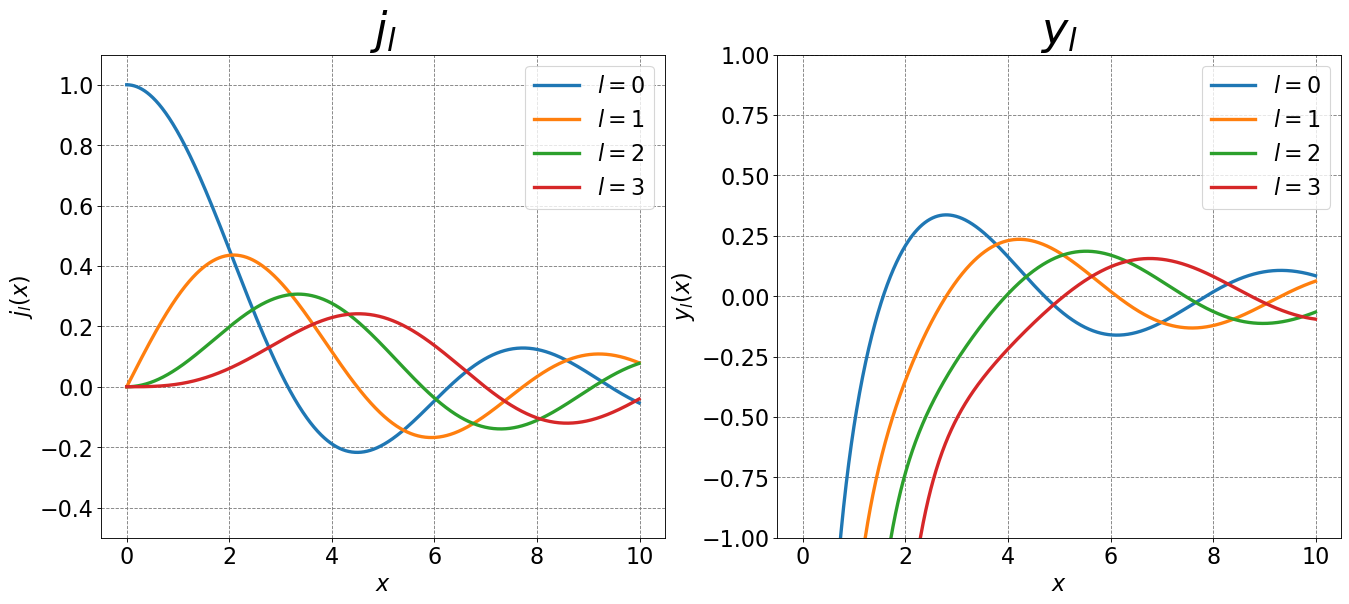

In [93]:
#### import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import spherical_jn, spherical_yn
fontsize = 20
x = np.arange(0.0, 10.0, 0.01)
fig, ax = plt.subplots(1,2,figsize=(20,8),dpi= 80, facecolor='w', edgecolor='k')
ax[0].set_ylim(-0.5, 1.1)
ax[0].set_title(r'$j_l$', fontsize=2*fontsize)
ax[0].set_xlabel(r'$x$',size=fontsize)
ax[0].set_ylabel(r'$j_l(x)$',size=fontsize)
ax[0].tick_params(axis='both',labelsize=fontsize)
for n in np.arange(0, 4):
    ax[0].plot(x, spherical_jn(n, x), lw = 3, label=rf'$l={n}$')
ax[0].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax[0].legend(loc='best',fontsize=fontsize)
# second type
ax[1].set_ylim(-1, 1)
ax[1].set_title(r'$y_l$',fontsize=2*fontsize)
for n in np.arange(0, 4):
    ax[1].plot(x, spherical_yn(n, x), lw = 3, label=rf'$l={n}$')
ax[1].set_xlabel(r'$x$',size=fontsize)
ax[1].set_ylabel(r'$y_l(x)$',size=fontsize)
ax[1].tick_params(axis='both',labelsize=fontsize)
ax[1].legend(loc='best',fontsize=fontsize)
ax[1].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
plt.show();

From the above plots we observe that both $j_l$ and $y_l$ are single-valued and continuous over the plotted domain. Additionally, the $j_l$ functions are all finite over the plotted domain.  The $y_l$ functions, however, are not finite over the domain as they tend to $-\infty$ as $x\rightarrow0$.  Thus, we get the solutions
\begin{equation}
u(r) = Arj_l(kr)
\end{equation}
or 
\begin{equation}
R_l(r) = Aj_l(kr)
\end{equation}

Applying the boundary condition that
\begin{equation}
R(r_0) = 0
\end{equation}
yields
\begin{equation}
kr_0 = \beta_{n,l}
\end{equation}
where $\beta_{n,l}$ is the $n$th root ($n=1,2,3...$) of the $l$th spherical Bessel function of the first type.  There are an infinite number of zeros for each $l$.  The values of these zeros cannot, in general, be determined analytically (except for $l=0$).  Here is a table of some of the zeros

| l\n  | 1    |  2   |  3   | 4    |  
|:---- | :--- | :--- | :--- | :--- |
| 0    | $\pi$| $2\pi$| $3\pi$ | $4\pi$|
| 1    | 4.493| 7.725 | 10.904 | 14.066 |
| 2    | 5.763| 9.095 | 12.322 | 15.515 |

From the equation $kr_0 = \beta_{n,l}$ we can also get the energy using the previously stated equality $k = \sqrt{\frac{2mE}{\hbar^2}}$
\begin{align}
\sqrt{\frac{2mE}{\hbar^2}}r_0 &= \beta_{n,l} \\
\Rightarrow \frac{2mE}{\hbar^2} &= \frac{\left(\beta_{n,l}\right)^2}{r_0^2} \\
\Rightarrow E_{l,n} &= \frac{\hbar^2\left(\beta_{n,l}\right)^2}{2mr_0^2}
\end{align}

Also, the radial wavefunction is now
\begin{equation}
R_{l,n}(r) = Aj_l\left(\frac{\beta_{n,l}}{r_0}r\right)
\end{equation}

## Combined Solution for the wave functions

We can now combine our solutions for the wave functions for $\theta$ and $\phi$ and $r$ to get
\begin{align}
\psi(r,\theta,\phi) &= R_{l,n}(r)Y_l^m(\theta,\phi) \\
&= Aj_l\left(\frac{\beta_{n,l}}{r_0}r\right)P_l^{|m|}(\cos\theta)e^{im\phi}
\end{align}

Below, I plot various versions of these functions.  First, I investigate how $n$ and $l$ affect the wave functions.

In [60]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import spherical_jn
from scipy.special import lpmv
%matplotlib inline
from scipy.optimize import root
    

def spherical_jn_zero(l, n, ngrid=100):
    """Returns nth zero of spherical bessel function of order l
    """
    if l > 0:
        # calculate on a sensible grid
        x = np.linspace(l, l + 2*n*(np.pi * (np.log(l)+1)), ngrid)
        y = spherical_jn(l, x)
    
        # Find m good initial guesses from where y switches sign
        diffs = np.sign(y)[1:] - np.sign(y)[:-1]
        ind0s = np.where(diffs)[0][:n]  # first m times sign of y changes
        x0s = x[ind0s]
    
        def fn(x):
            return spherical_jn(l, x)

        return [root(fn, x0).x[0] for x0 in x0s][-1]
    else:
        return n*np.pi
    
def particle_in_sphere_wf(r,theta,phi,n,l,m):
    denom = spherical_jn_zero(l, n)
    return sph_harm(m, l, phi, theta).real*spherical_jn(l, r*denom)


def plot_particle_in_sphere_wf(n,l,m, ax_obj, r=np.linspace(0,1,15), theta=np.linspace(0,np.pi,20), phi=np.linspace(0,1.5*np.pi,25)):
    R, THETA, PHI = np.meshgrid(r, theta, phi)
    R = R.flatten()
    THETA = THETA.flatten()
    PHI = PHI.flatten()
    x = R*np.sin(THETA)*np.cos(PHI) 
    y = R*np.sin(THETA)*np.sin(PHI)
    z = R*np.cos(THETA)
    wf = particle_in_sphere_wf(R,THETA,PHI,n,l,m)
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    ax_obj.scatter3D(x,y,z,c=wf, cmap='RdBu', vmin=-0.2, vmax=0.2,alpha=0.25)
    ax_obj.set_box_aspect((100,100,100))
    #ax_obj.set_axis_off()
    ax_obj.axes.xaxis.set_ticklabels([])
    ax_obj.axes.yaxis.set_ticklabels([])
    ax_obj.axes.zaxis.set_ticklabels([])
    
def plot_particle_in_sphere_wf_xz_projection(n,l,m, ax_obj):
    x = np.linspace(-1,1,100)
    z = np.linspace(-1,1,100)
    y = np.zeros(100)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    R = np.sqrt(X*X + Y*Y + Z*Z).flatten()
    THETA = np.arccos(Z.flatten()/R)
    PHI = np.arctan2(Y,X).flatten()
    wf = np.zeros(R.shape)
    indeces = np.argwhere(R <= 1)
    wf[indeces] = particle_in_sphere_wf(R[indeces],THETA[indeces],PHI[indeces],n,l,m)
    wf = wf.reshape(X.shape)
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    c = ax_obj.pcolormesh(X, Z, wf, cmap='RdBu', vmin=-0.2, vmax=0.2)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-1, 1, -1, 1])
    ax_obj.set_aspect('equal')
    ax_obj.set_axis_off()
    return c

def plot_particle_in_sphere_wf_xy_projection(n,l,m, ax_obj):
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    z = np.zeros(100)
    X, Y= np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    R = np.sqrt(X*X + Y*Y + Z*Z).flatten()
    THETA = np.arccos(Z.flatten()/R)
    PHI = np.arctan2(Y,X).flatten()
    wf = np.zeros(R.shape)
    indeces = np.argwhere(R <= 1)
    wf[indeces] = particle_in_sphere_wf(R[indeces],THETA[indeces],PHI[indeces],n,l,m)
    wf = wf.reshape(X.shape)
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    c = ax_obj.pcolormesh(X, Y, wf, cmap='RdBu', vmin=-0.2, vmax=0.2)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-1, 1, -1, 1])
    ax_obj.set_aspect('equal')
    ax_obj.set_axis_off()
    return c

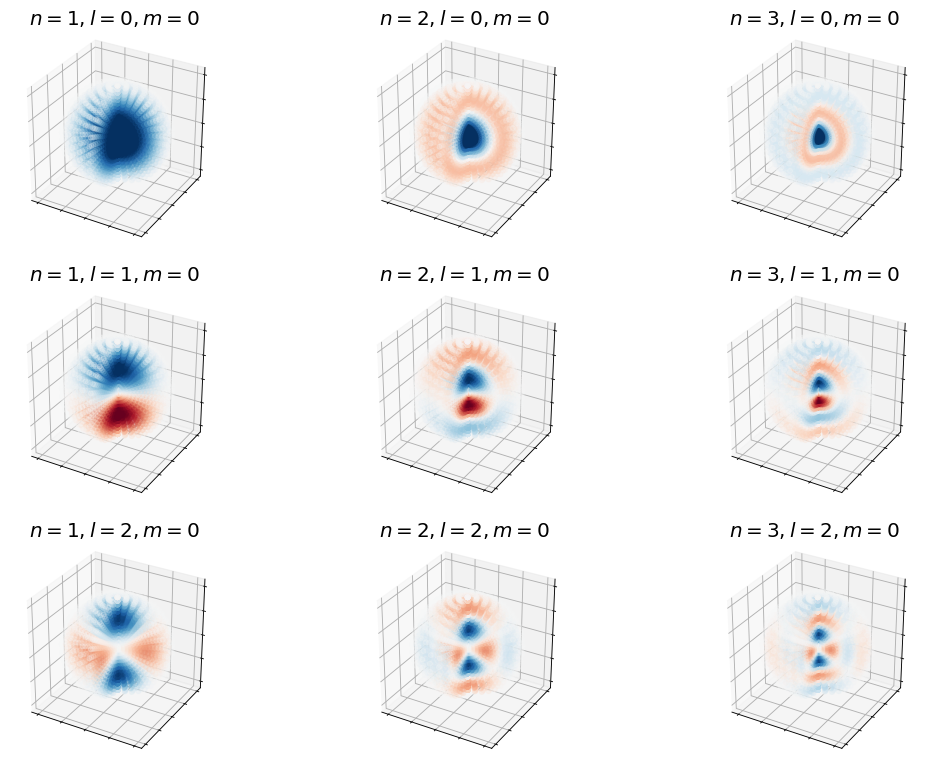

In [61]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k',subplot_kw={'projection': '3d'}) 
for l in range(3):
    for n in range(1,4):
        plot_particle_in_sphere_wf(n,l,0,ax[l,n-1])
plt.show();

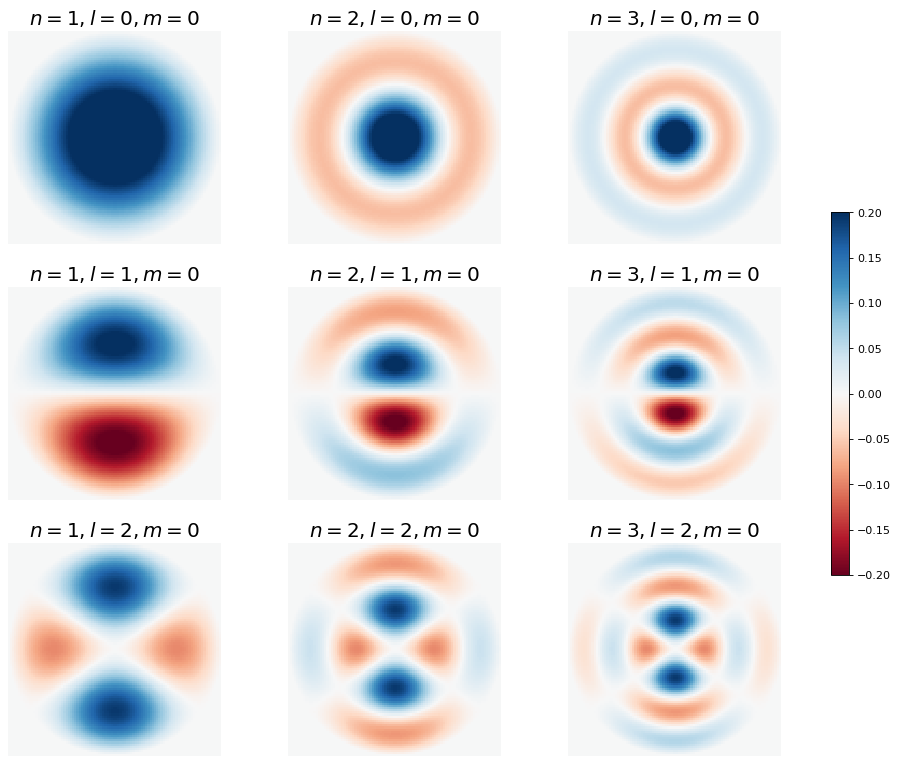

In [49]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k') 
for l in range(3):
    for n in range(1,4):
        c = plot_particle_in_sphere_wf_xz_projection(n,l,0,ax[l,n-1])
cbar = fig.colorbar(c,ax=ax,shrink=0.5)
cbar.ax.tick_params(labelsize=10)
plt.show();

Next we see how $l$ and $m$ affect the wave functions.

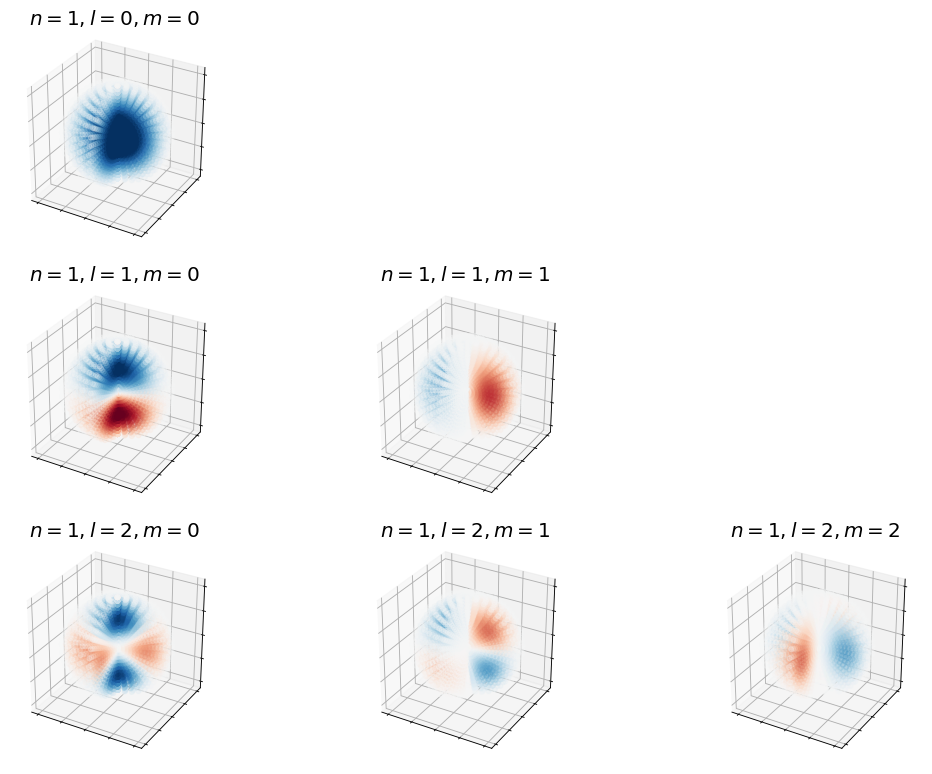

In [62]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k',subplot_kw={'projection': '3d'}) 
for l in range(3):
    for m in range(3):
        if m <= l:
            plot_particle_in_sphere_wf(1,l,m,ax[l,m])
        else: 
            ax[l,m].set_axis_off()
plt.show();

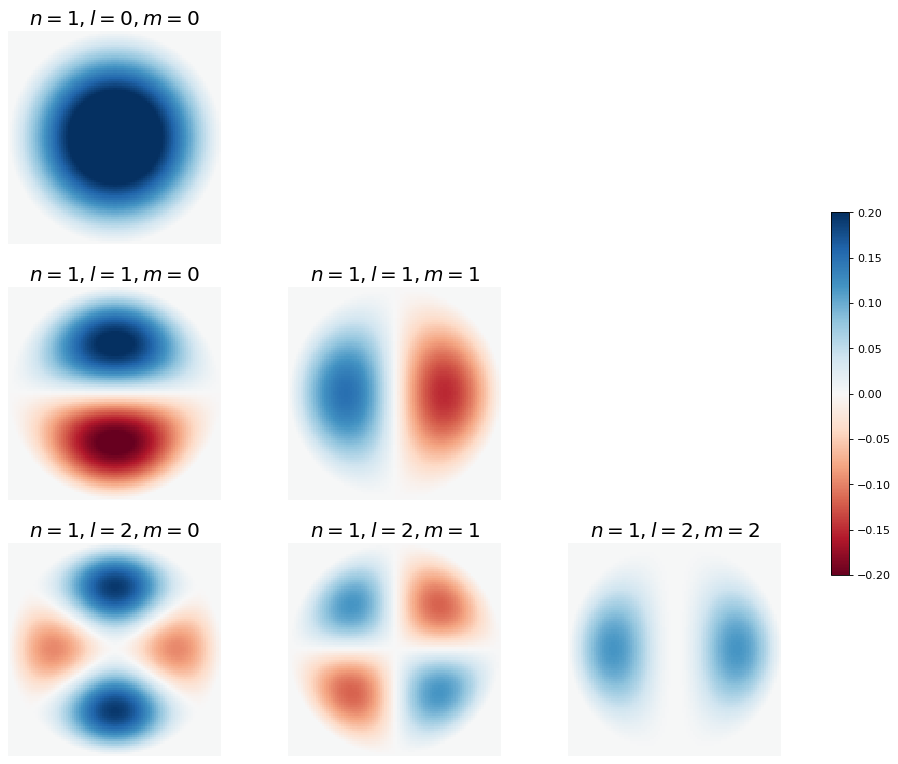

In [51]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k') 
for l in range(3):
    for m in range(3):
        if m <= l:
            plot_particle_in_sphere_wf_xz_projection(1,l,m,ax[l,m])
        else: 
            ax[l,m].set_axis_off()
cbar = fig.colorbar(c,ax=ax,shrink=0.5)
cbar.ax.tick_params(labelsize=10)
plt.show();

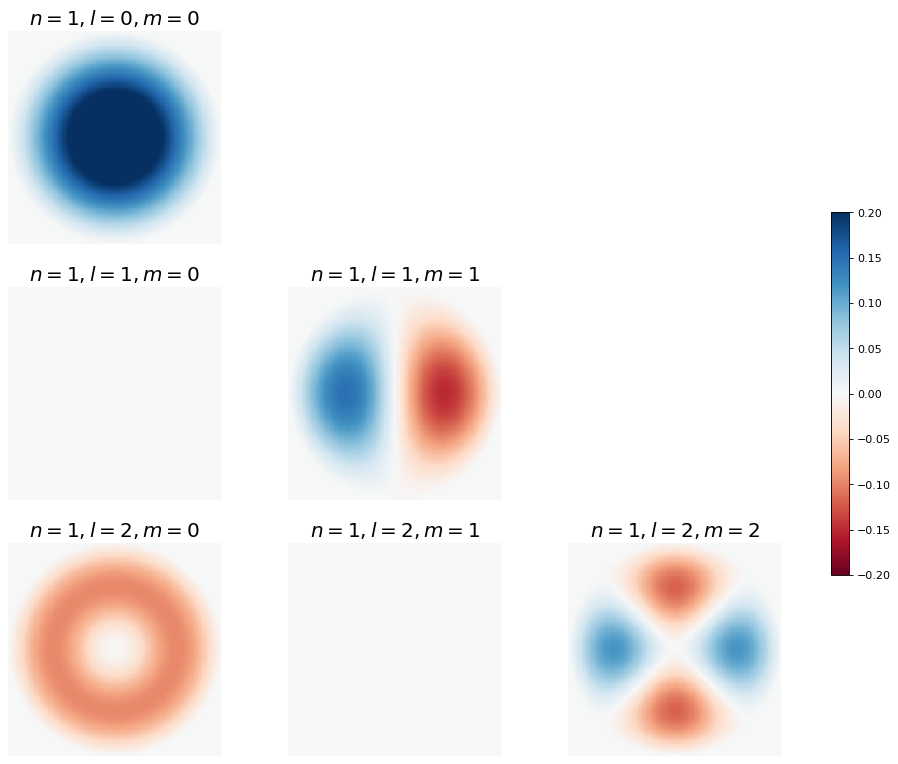

In [52]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k') 
for l in range(3):
    for m in range(3):
        if m <= l:
            plot_particle_in_sphere_wf_xy_projection(1,l,m,ax[l,m])
        else: 
            ax[l,m].set_axis_off()
cbar = fig.colorbar(c,ax=ax,shrink=0.5)
cbar.ax.tick_params(labelsize=10)
plt.show();